In [1]:
from imp_sec_cam_nor.util.Nd.sizedist_class_v2.SizedistributionBins import SizedistributionStationBins
from imp_sec_cam_nor.util.Nd.sizedist_class_v2.SizedistributionStation import SizedistributionStation
from imp_sec_cam_nor.util.collocate.collocateLONLAToutput import CollocateLONLATout
from imp_sec_cam_nor.constants import sized_varListNorESM, list_sized_vars_noresm, list_sized_vars_nonsec
#from useful_scit.util import log
import useful_scit.util.log as log
from useful_scit.imps import *
import time
log.ger.setLevel(log.log.INFO)

/persistent01/packages/useful-scit/useful_scit/imps/__init__.py:78: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']


/home/ubuntu/mnts/nird/projects/IMP_SEC_CAM-Nor/imp_sec_cam_nor/data_info/area_defs.csv
/home/ubuntu/mnts/nird/projects/IMP_SEC_CAM-Nor/imp_sec_cam_nor/data_info/


In [2]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'
variables = sized_varListNorESM['NCONC'] + sized_varListNorESM['NMR'] + sized_varListNorESM['SIGMA']
history_field='.h1.'
cases_sec = ['NFHIST_CAM-Nor-SEC_test22_percSECcompset_mv_metdata',
             'NFHIST_CAM-Nor-SEC_test21_percSECcompset_rmExcess',
             'NFHIST_CAM-Nor-SEC_test20_cp10_test_percSECcompset',
             'NFHIST_CAM-Nor-SEC_test9_test_removing_excess_files',
    'NFHIST_CAM-Nor-SEC_test8_test_compset',
    'NFHIST_CAM-Nor-SEC_test6_priority_files',
             #'NFHIST_CAM-Nor-SEC_test5_noSource',
             'NFHIST_CAM-Nor-SEC_test4_docu_done','NFHIST_CAM-Nor-SEC_test3','SECTv21_ctrl_koagD']# 'NFHIST_CAM-Nor-SEC_test2','NFHIST_CAM-Nor-SEC_test1',
cases_orig =[]#'noSECTv11_noresm2_NFHIST']#'noSECTv11_ctrl'] #/noSECTv11_ctrl
from_t = '2007-01-01'
to_t = '2007-01-06'
t1 =time.time()

## Collocate NCONC\*, NMR\* and SIGMA\*

In [3]:
varl_s=['nrSOA_SEC01','dNdlogD_mod','dNdlogD_mode01', 'dNdlogD_sec', 'NMR01','NCONC01']#,'SO4_NAcondTend', 'SOA_NAcondTend']
varl_o=['NCONC01']#dNdlogD_mod','dNdlogD_mode01', 'NMR01','NCONC01']#,'SO4_NAcondTend', 'SOA_NAcondTend']
dic_sd={}
for case_name in cases_sec:
    varlist =varl_s
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    a =c.get_station_ds(varlist)
    dic_sd[case_name]=a.isel(lev=-1)
    print(case_name)
    #if c.check_if_load_raw_necessary(varlist ):
    #    a = c.make_station_data_all()
for case_name in cases_orig:
    print(case_name)
    varlist =varl_o
    c = CollocateLONLATout(case_name, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    a =c.get_station_ds(varlist)
    dic_sd[case_name]=a.isel(lev=-1)

/home/ubuntu/mnts/nird/projects//Output_data_IMP_SEC_CAM-Nor//collocated_ds//NorESM/NFHIST_CAM-Nor-SEC_test22_percSECcompset_mv_metdata/nrSOA_SEC01_NFHIST_CAM-Nor-SEC_test22_percSECcompset_mv_metdata_2007-01-01_2007-01-06_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_IMP_SEC_CAM-Nor//collocated_ds//NorESM/NFHIST_CAM-Nor-SEC_test22_percSECcompset_mv_metdata/dNdlogD_mod_NFHIST_CAM-Nor-SEC_test22_percSECcompset_mv_metdata_2007-01-01_2007-01-06_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_IMP_SEC_CAM-Nor//collocated_ds//NorESM/NFHIST_CAM-Nor-SEC_test22_percSECcompset_mv_metdata/dNdlogD_mode01_NFHIST_CAM-Nor-SEC_test22_percSECcompset_mv_metdata_2007-01-01_2007-01-06_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_IMP_SEC_CAM-Nor//collocated_ds//NorESM/NFHIST_CAM-Nor-SEC_test22_percSECcompset_mv_metdata/dNdlogD_sec_NFHIST_CAM-Nor-SEC_test22_percSECcompset_mv_metdata_2007-01-01_2007-01-06_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Outp

In [4]:
    
stations = dic_sd[case_name]['station'].values
stations

array(['ASP', 'BIR', 'PAL', 'PLA', 'SMR', 'VHL', 'BOS', 'KPO', 'MPZ',
       'OBK', 'HPB', 'WAL', 'CBW', 'HWL', 'MHD', 'FKL', 'JRC', 'ZEP',
       'PDD', 'SSL', 'ZSF', 'JFJ', 'BEO', 'CMN'], dtype=object)

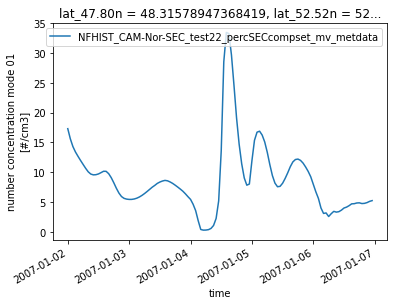

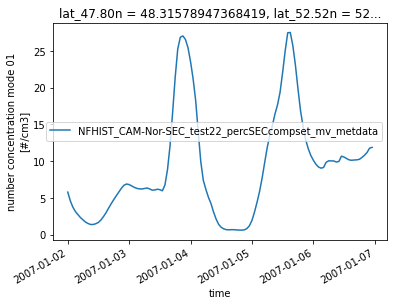

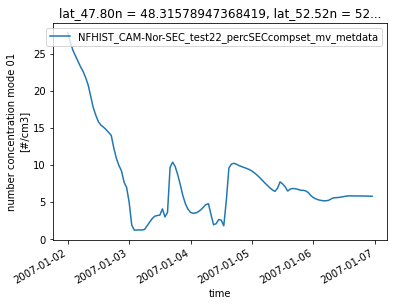

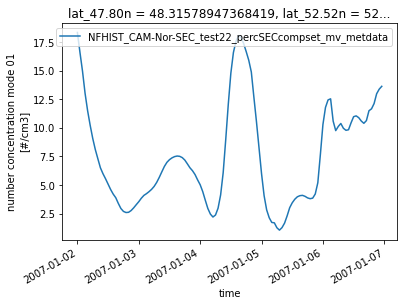

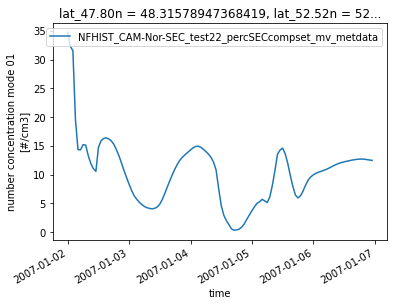

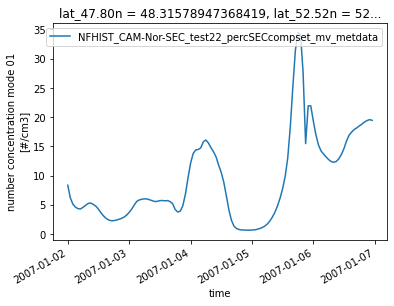

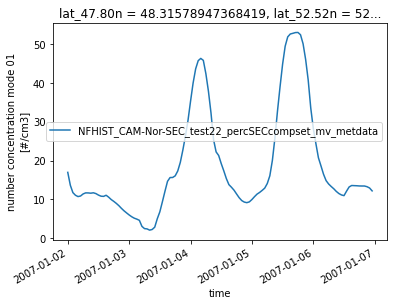

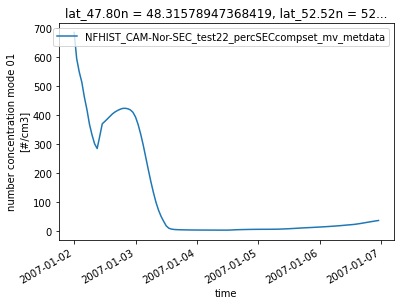

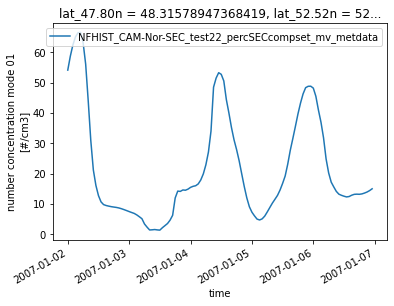

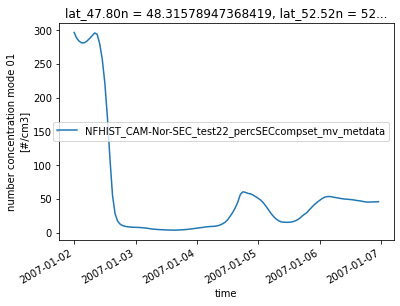

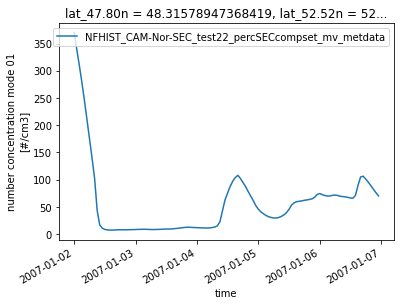

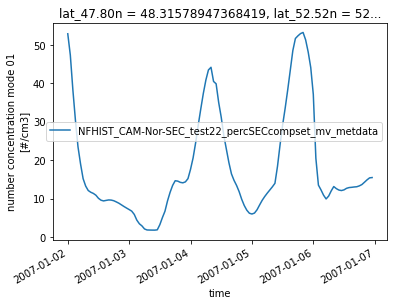

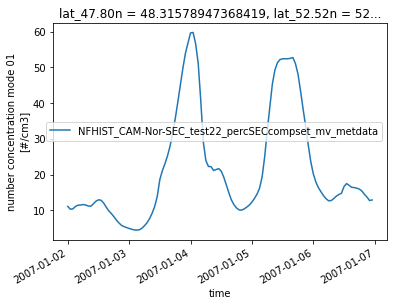

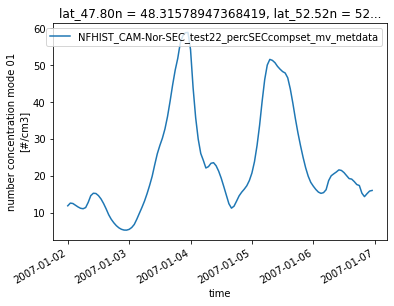

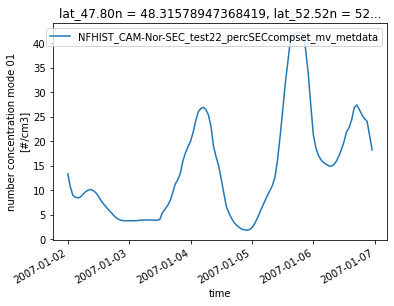

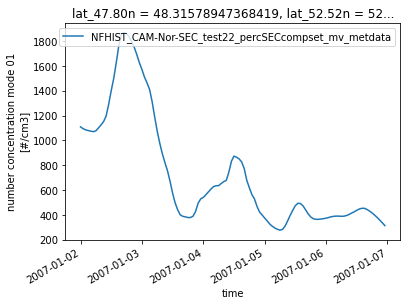

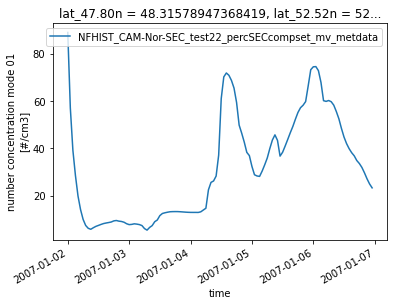

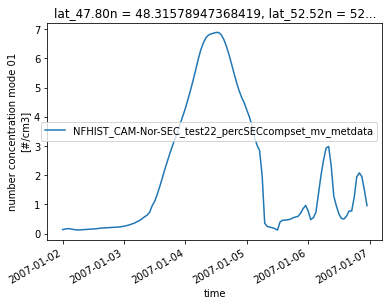

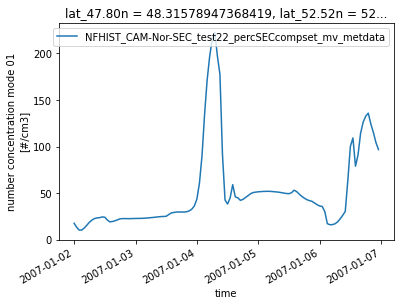

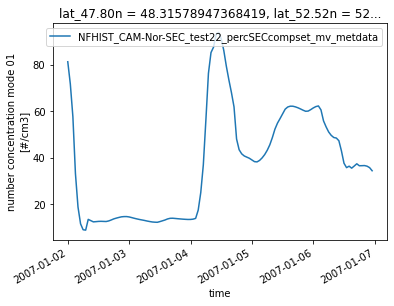

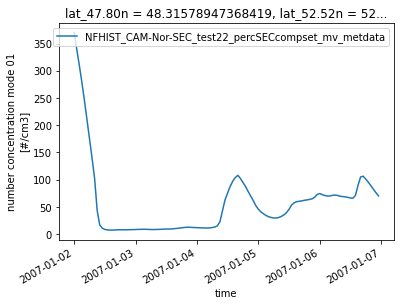

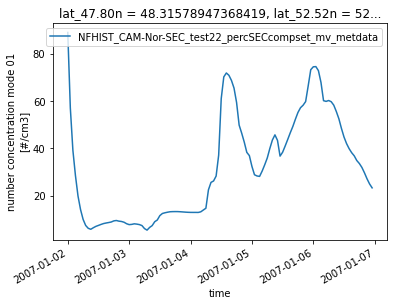

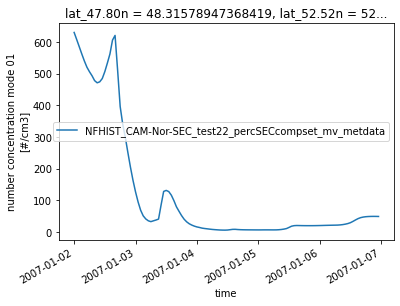

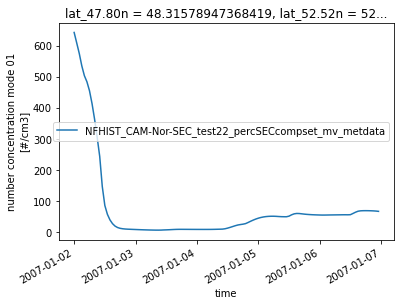

In [5]:
v = 'NCONC01'
for s in stations:
    for c in cases_sec[:1]:
        dic_sd[c][v].sel(station=s).isel(time=slice(24,None)).plot( label=c)
    plt.legend()
    plt.show()

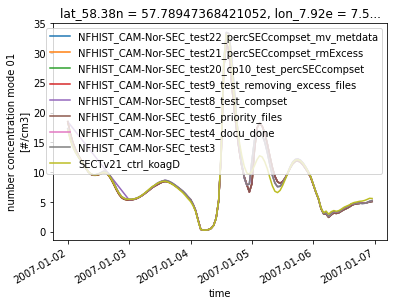

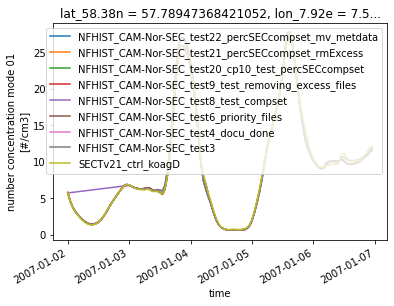

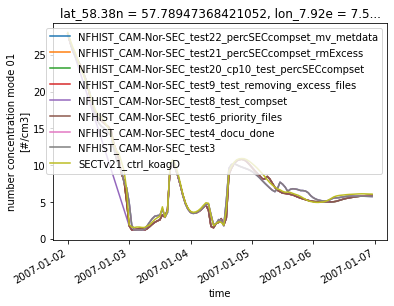

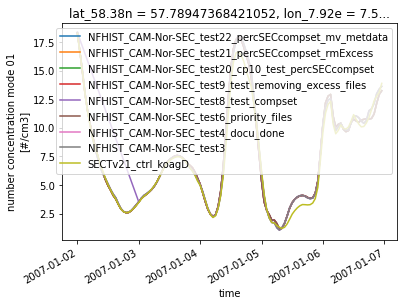

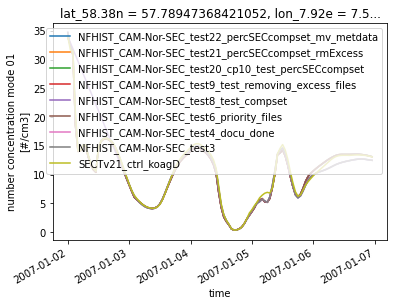

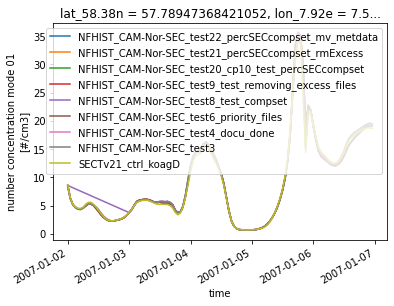

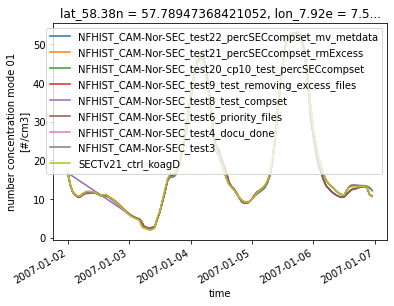

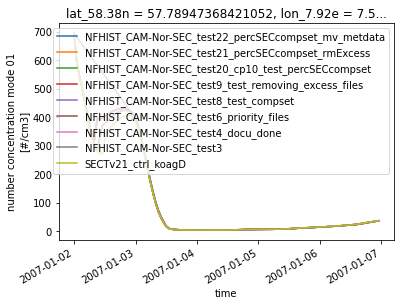

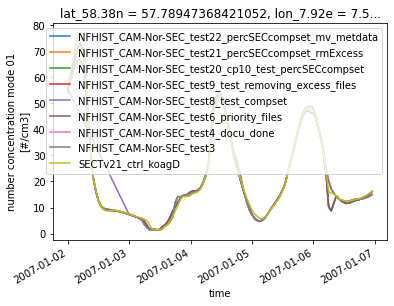

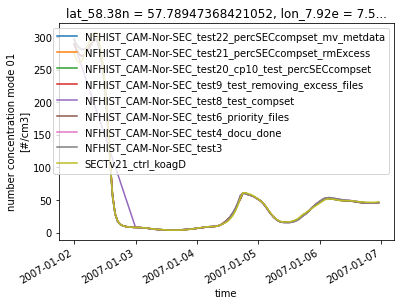

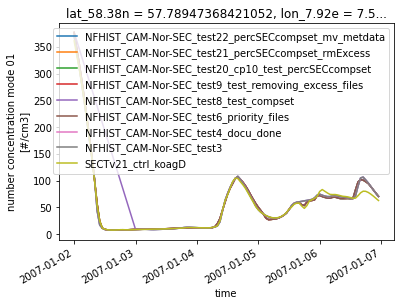

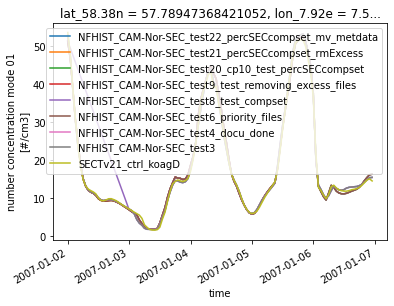

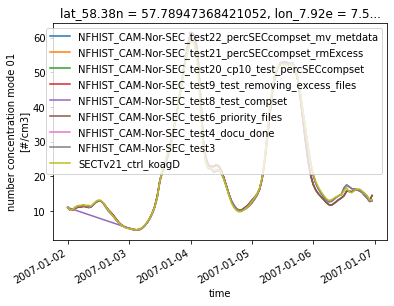

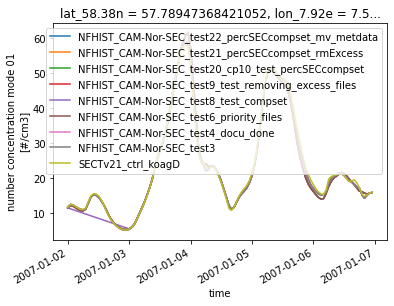

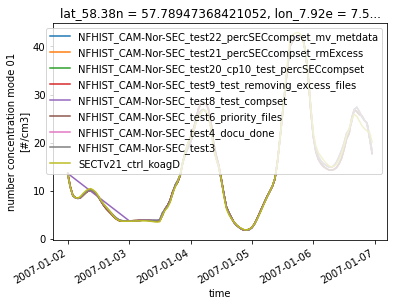

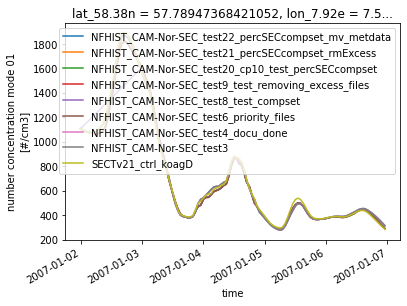

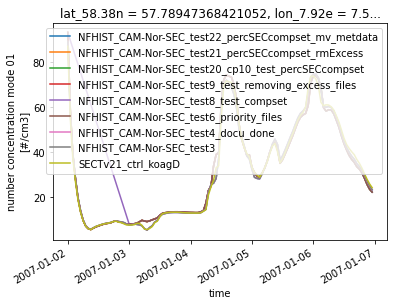

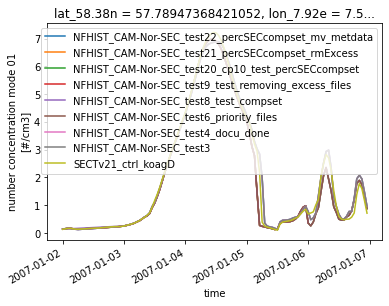

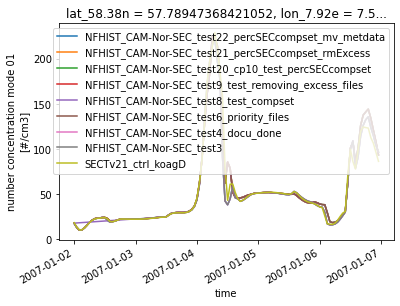

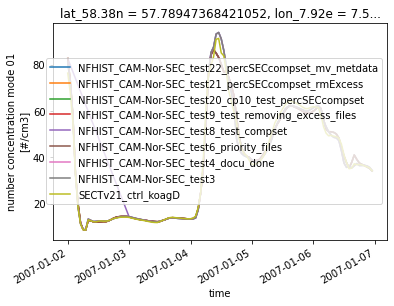

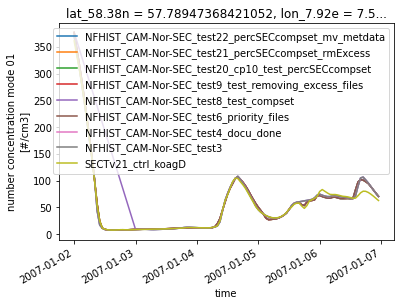

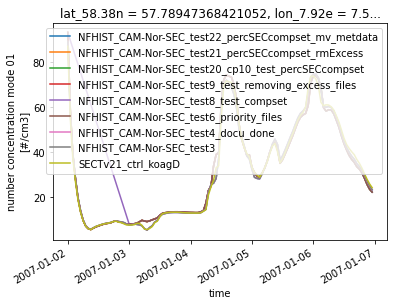

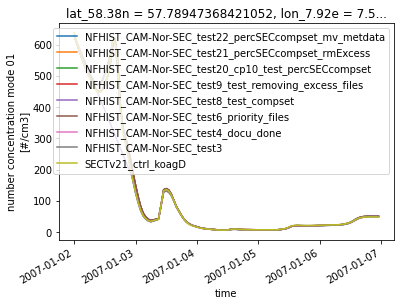

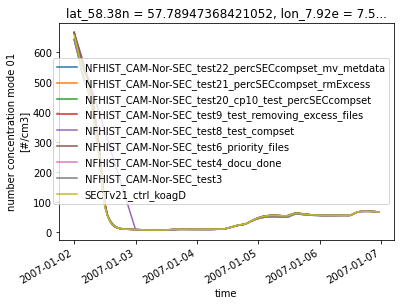

In [6]:
v = 'NCONC01'
for s in stations:
    for c in cases_sec:
        dic_sd[c][v].sel(station=s).isel(time=slice(24,None)).plot( label=c)
    plt.legend()
    plt.show()

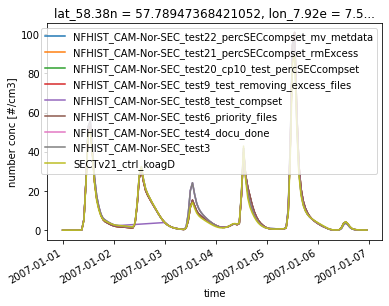

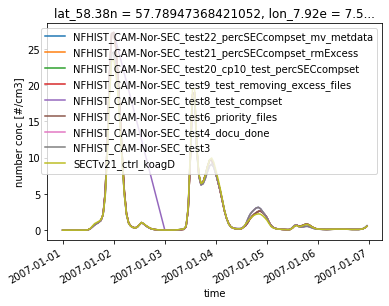

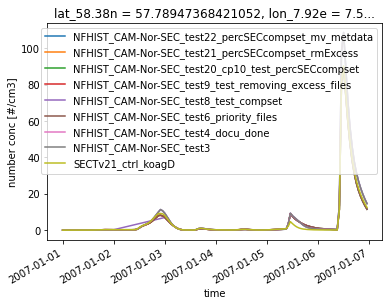

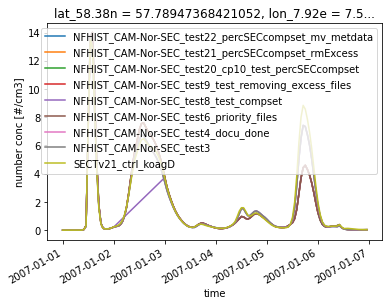

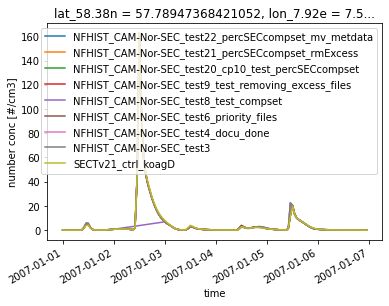

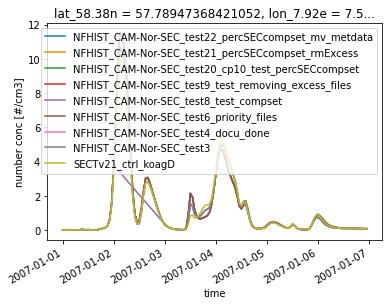

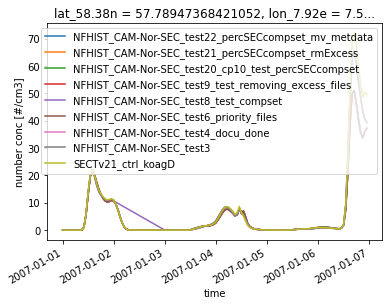

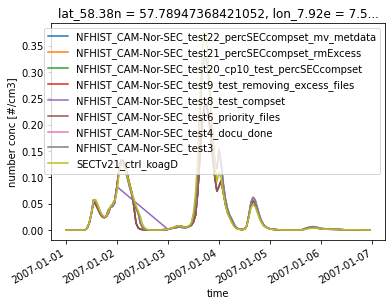

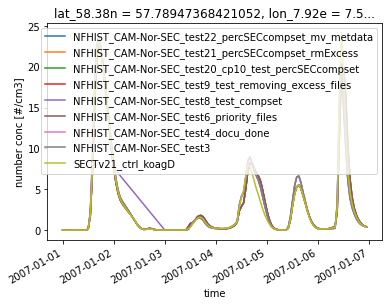

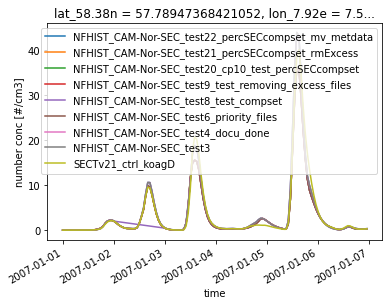

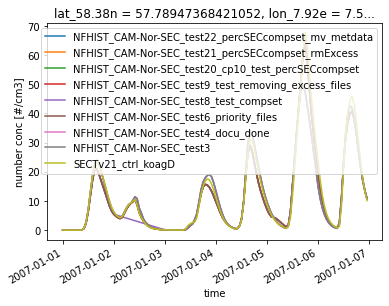

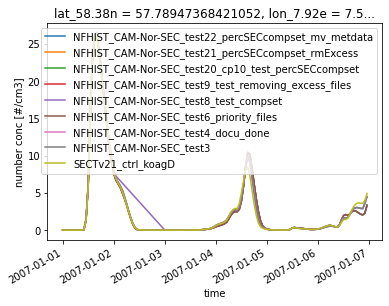

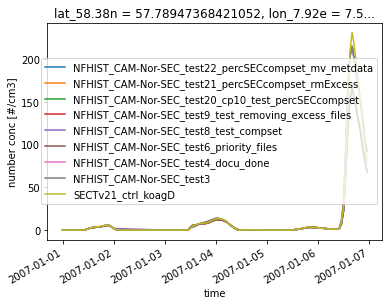

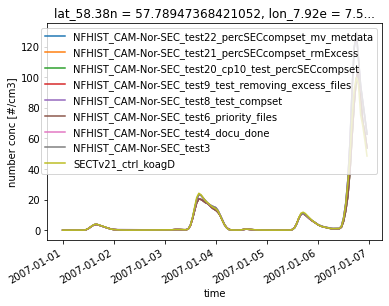

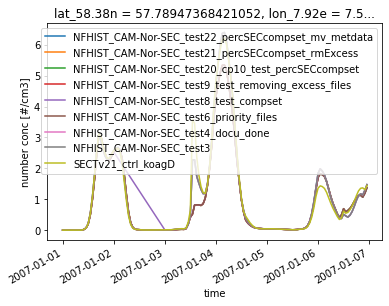

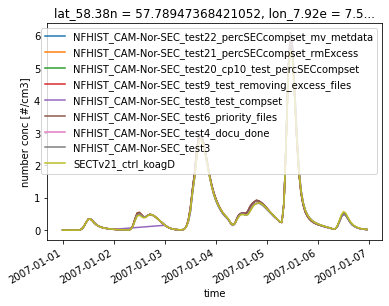

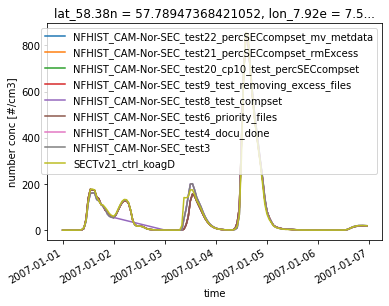

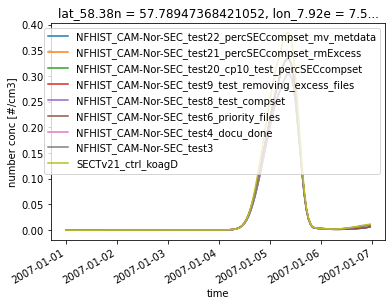

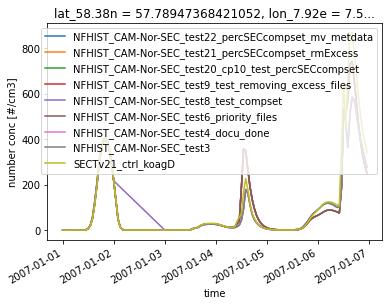

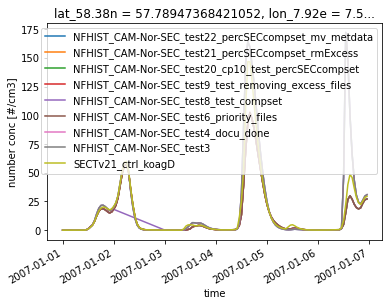

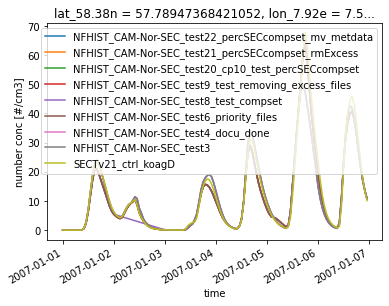

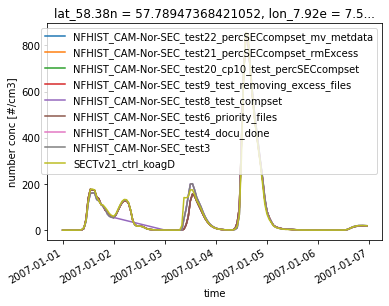

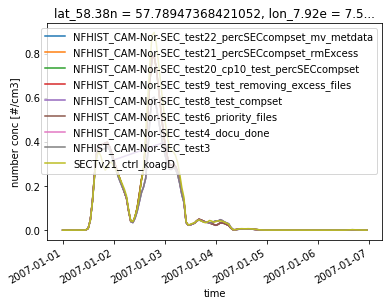

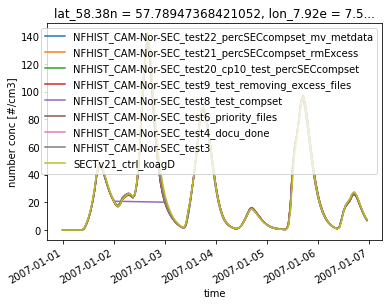

In [7]:
v = 'nrSOA_SEC01'
for s in stations:
    for c in cases_sec:
        dic_sd[c][v].sel(station=s).plot(label=c)
    plt.legend()
    plt.show()

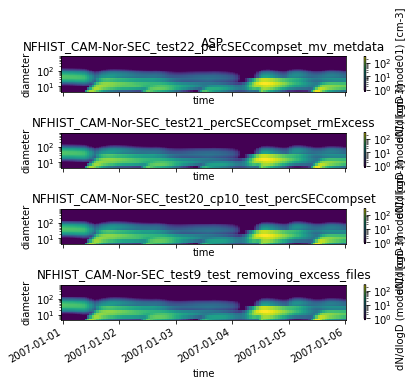

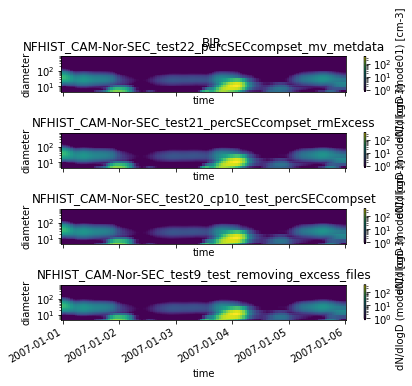

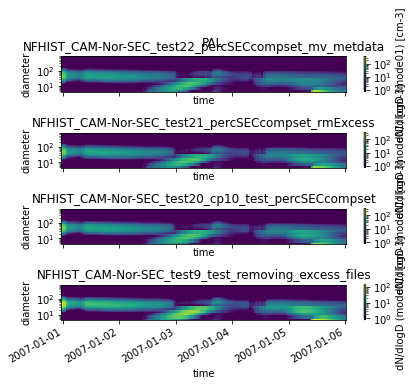

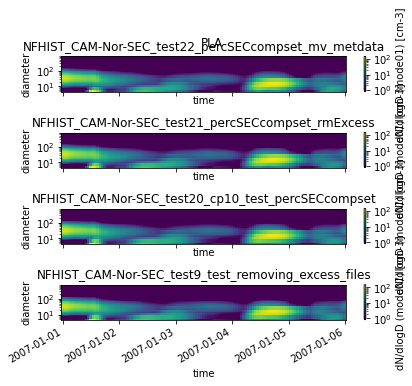

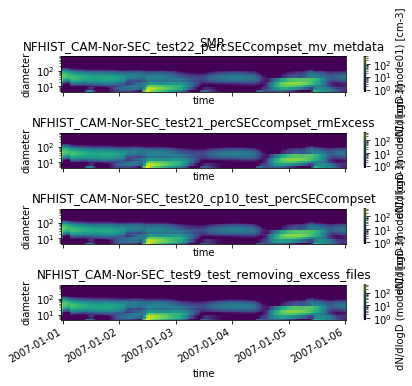

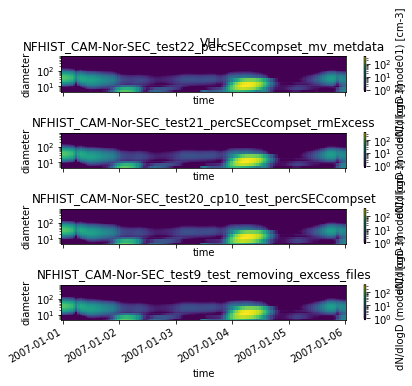

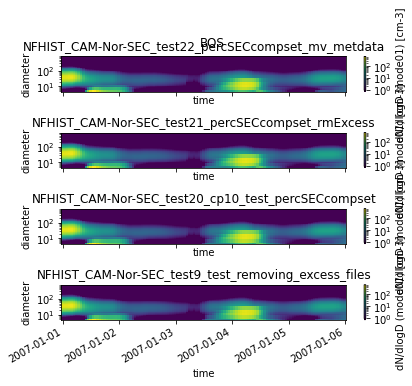

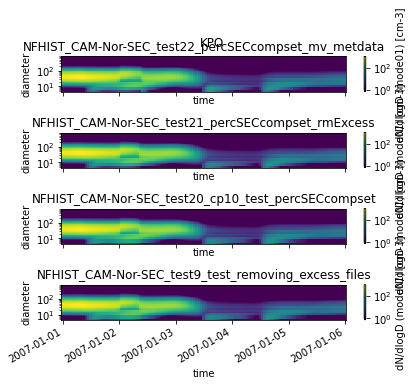

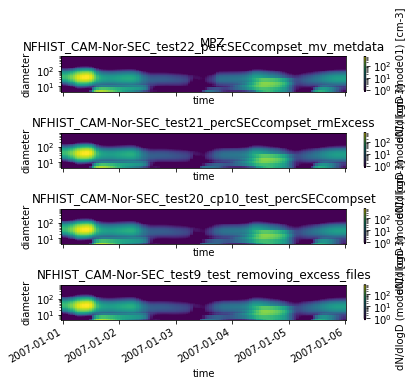

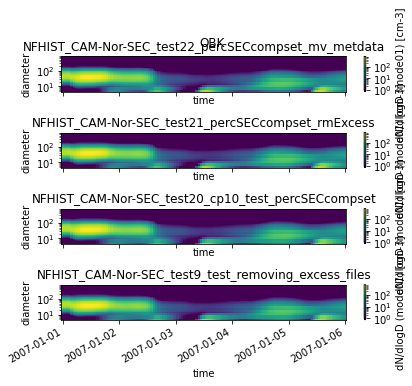

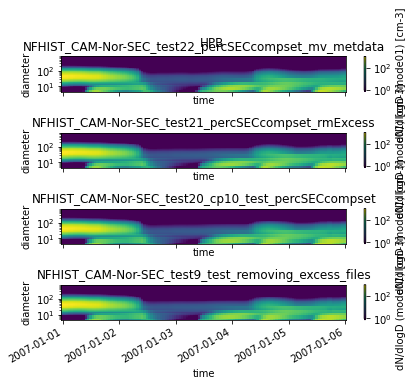

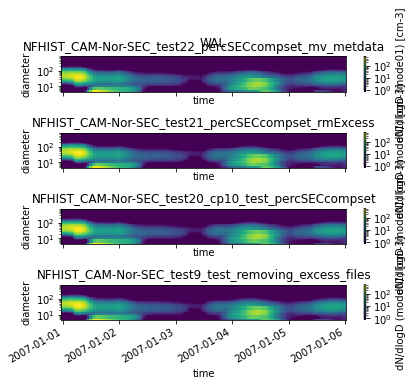

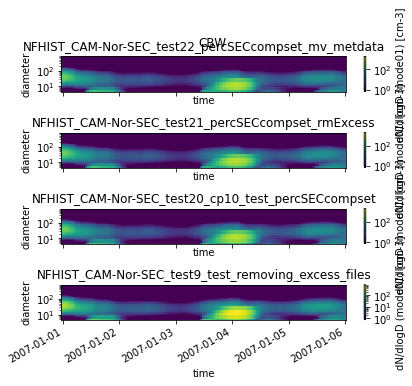

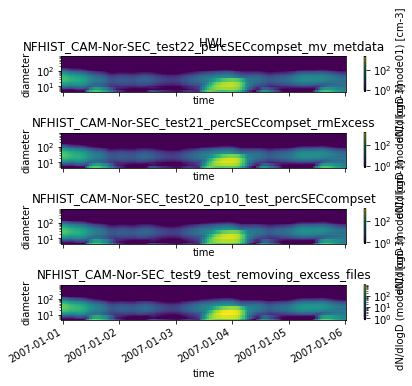

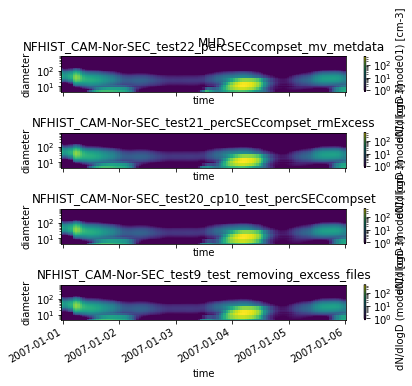

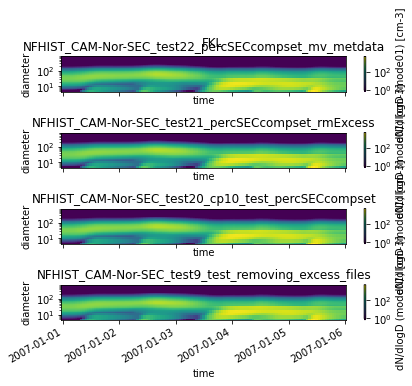

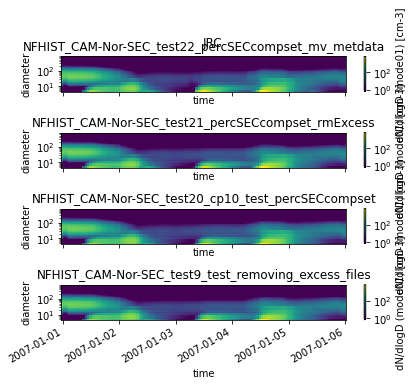

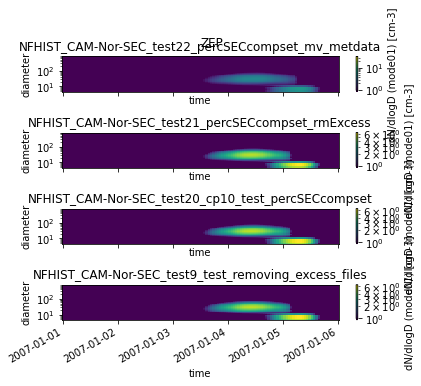

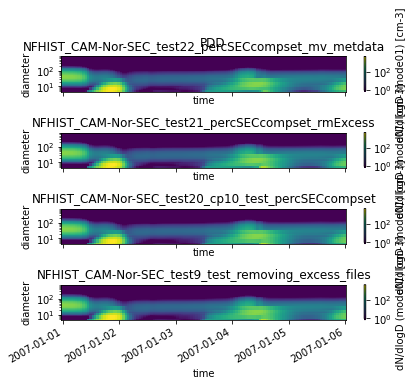

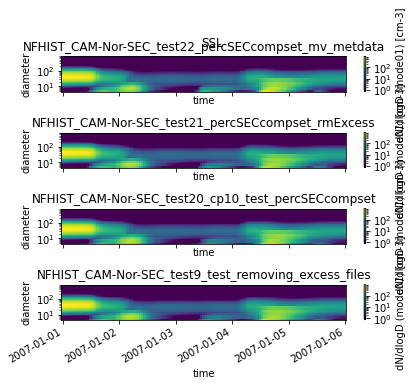

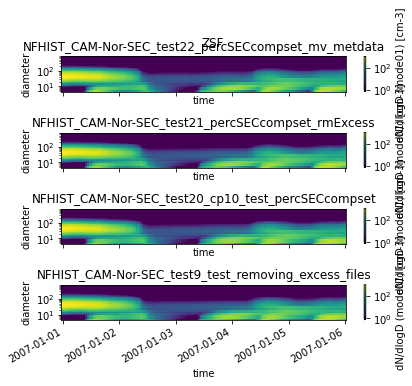

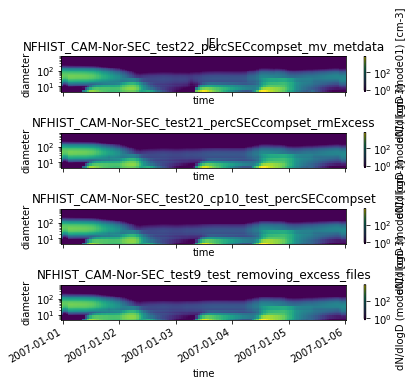

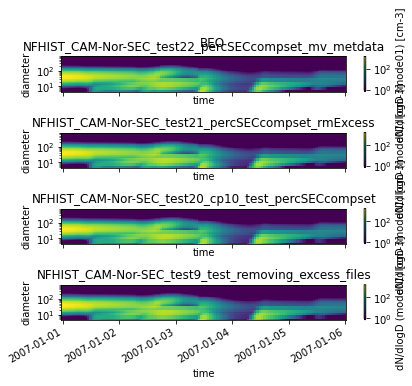

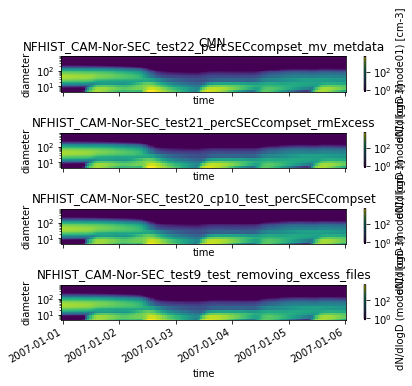

In [8]:
import matplotlib as mpl
from matplotlib import colors
v = 'dNdlogD_mode01'
v2 = 'dNdlogD_sec'
for s in stations:
    fi, axs = plt.subplots(4, sharex=True, figsize=[6,5])
    for c, ax in zip(cases_sec,axs):
        pl_da = dic_sd[c][v].sel(station=s) + dic_sd[c][v2].sel(station=s)
        pl_da.plot(x='time',ax=ax, yscale='log', norm =colors.LogNorm(vmin=1))
        ax.set_ylim([4.5,800])
        ax.set_title(c)
    plt.tight_layout()
    plt.suptitle(s)
    plt.show()